# How to fit any model function to data
### Using scipy.optimize.curve_fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import  curve_fit

## Define data (x, y, $\sigma_x$, $\sigma_y$)

In [6]:
# Some random data (linear)
x = np.asarray([0.9,2.4,3.3,3.7,4.8])
y = np.asarray([1.1,1.89,2.71,4.1,4.9])
sigma_x = np.asarray([0.5,0.5,0.5,0.5,0.5])
sigma_y = np.asarray([0.1,0.1,0.1,0.1,0.1])

## Define model function

Must be a function taking $x$ as first input and then the best fit parameters.

The function must return $y$ as a combination of $x$ and the best fit parameters.

In [2]:
def linear(x,a,b): # Straight line
    return a*x + b

## Fit model function over data

- popt contains the best-fit parameters;
- pcov contains the covariance matrix, from which the errors can be computed.





- NEVER use "absolute_sigma=True" when doing science stuff, because it scales the sigmas thus making the $\chi^2$ incoherent with the residue plot.


In [9]:
popt,pcov = curve_fit(linear,x,y, sigma=sigma_y, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

# Create a list of tuples, containing the best-fit parameters and their uncertainty
best_fit_parameters = zip(popt, perr)

# Print the best-fit parameters and their uncertainties
i=0
for param, err in best_fit_parameters:
    i=i+1
    print(f"Parameter {i}: {param:.3f} +/- {err:.3f}")

Parameter 1: 1.021 +/- 0.034
Parameter 2: -0.142 +/- 0.112


## Calculate the $\chi^2$ and reduced $\chi^2$

### Degrees of freedom:
$$
d.o.f. = N - 2
$$

Where N is the number of data points and 2 is the number of parameters.

The reduced chi-squared is the chi-squared divided by the d.o.f.


In [8]:
chi_2 = (((y-linear(x,*popt))/sigma_y)**2).sum()
print(f"Chi squared: {chi_2:.3f}")

# determine the ndof
ndof=len(x)-len(popt)

# calculate the reduced chi squared
red_chi_2 = chi_2/ndof
print(f"Reduced chi squared: {red_chi_2:.3f}")

Chi squared: 78.255
Reduced chi squared: 26.085


## Plot data

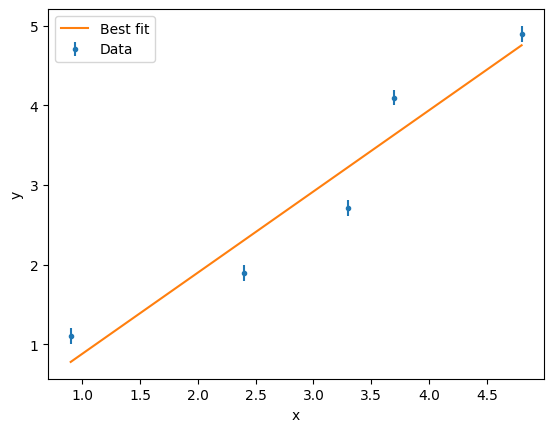

In [12]:
x_lin = np.linspace(min(x),max(x),2*len(x))
plt.errorbar(x,y,yerr=sigma_y, fmt=".", label="Data")
plt.plot(x_lin,linear(x_lin,*popt), label="Best fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## Normalized Residues

Text(0.05, 0.95, '$\\chi^2/ndof=26.09$')

<Figure size 640x480 with 0 Axes>

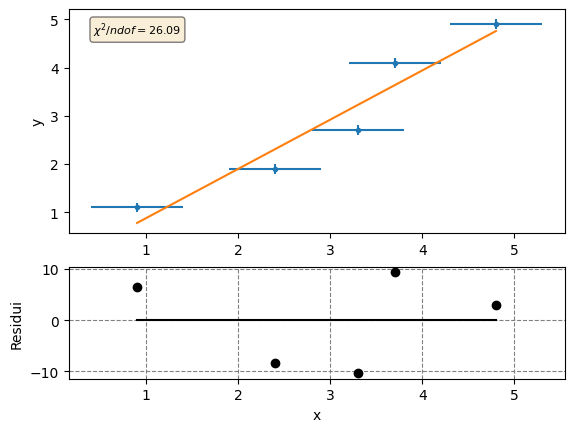

In [19]:
fig = plt.figure('Residui')
norm = np.asarray([x**2 for x in sigma_y]).sum()
res = [(_y - linear(_x, popt[0], popt[1])) / norm for _x,_y in zip(x,y)]

fig, ax = plt.subplots(2,1, height_ratios=[2, 1])

ax[1].errorbar(x, res, sigma_y, color='black', fmt='o')
ax[1].grid(which='both', ls='dashed', color='gray')
plt.xlabel('x')
ax[1].plot(x_lin, np.zeros_like(x_lin), color='black')
ax[1].set_ylabel('Residui')
ax[1].sharex(ax[0])

ax[0].errorbar(x,y,yerr=sigma_y,xerr=sigma_x, fmt=".", label="Data")
ax[0].plot(x_lin,linear(x_lin,*popt), label="Best fit")
ax[0].set_ylabel('y')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax[0].text(0.05, 0.95, '\n'.join((
    r'$\chi^2/ndof=%.2f$' % (red_chi_2),
)), transform=ax[0].transAxes, fontsize=8,
        verticalalignment='top', bbox=props)